In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np


# Problem 3a

For this question, since we are a group with odd number of students, FE-GWP1_model_seletion_1.csv is chosen.

We use Backward Selection using AIC and Forward Selection using Adjusted $R^2$ to choose the best set of features and create an optimal model. 

In [3]:
# Import required libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import itertools
import numpy as np

# Load the dataset
df = pd.read_csv('FE-GWP1_model_selection_2.csv')
df.columns = df.columns.str.strip()

# View first few rows
df.head()

,Y,Z1,Z2,Z3,Z4,Z5
0,2.172296,0.121634,-0.051562,0.570616,1.279931,0.075233
1,0.502380,0.025446,-0.093062,0.304875,-0.582292,0.377388
2,0.711362,-0.136716,-0.082229,-0.191680,-0.647970,1.230986
3,-0.557168,-0.284459,-0.170922,-0.853670,-1.256146,-0.991686
4,1.500199,0.105205,-0.169141,0.826558,0.640945,1.099873


## OLS Regression

In [4]:
full_model = ols('Y ~ Z1 + Z2 + Z3 + Z4 + Z5', data=df).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3062.
Date:                Mon, 16 Jun 2025   Prob (F-statistic):          2.07e-102
Time:                        16:29:20   Log-Likelihood:                 88.951
No. Observations:                 100   AIC:                            -165.9
Df Residuals:                      94   BIC:                            -150.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0097      0.013     77.496      0.0

## Backward Selection using AIC

AIC penalizes the number of parameters used in the model. AIC would only prefer removal of a variable from the complete regression model when the variable doesn't significantly contribute to the model. This prevents from overfitting.

AIC is used in feature selection here since AIC is an in-sample information criterion which results in a simple model helpful for interpretation. Thus, the result from Backward Selection using AIC results in the simplest and an interpretable model.

In [5]:
def compute_aic(features):
    formula = 'Y ~ ' + ' + '.join(features)
    model = ols(formula, data=df).fit()
    return model.aic, model

# Initialize
features = ['Z1', 'Z2', 'Z3', 'Z4', 'Z5']
best_aic = compute_aic(features)[0]
current_features = features.copy()

improvement = True

# Backward elimination loop
while improvement and len(current_features) > 1:
    aic_values = []
    models = []
    for feature in current_features:
        test_features = current_features.copy()
        test_features.remove(feature)
        aic, model = compute_aic(test_features)
        aic_values.append((aic, feature, model))
    
    # Find best candidate to remove
    aic_values.sort()
    best_candidate = aic_values[0]
    
    if best_candidate[0] < best_aic:
        print(f'Removing {best_candidate[1]} --> AIC improved from {best_aic:.2f} to {best_candidate[0]:.2f}')
        best_aic = best_candidate[0]
        current_features.remove(best_candidate[1])
    else:
        improvement = False

# Final selected model
final_backward_model = compute_aic(current_features)[1]
print(final_backward_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3062.
Date:                Mon, 16 Jun 2025   Prob (F-statistic):          2.07e-102
Time:                        16:29:20   Log-Likelihood:                 88.951
No. Observations:                 100   AIC:                            -165.9
Df Residuals:                      94   BIC:                            -150.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0097      0.013     77.496      0.0

## Forward Selection using Adjusted $R^2$

Adjusted-$R^2$ unlike $R^2$ doesn't always increase as we add variables in the regression mechanism. Adjusted $R^2$ is inversely related to the number of variables used in the regression. Thus, it decreases with the addition of a variable which doesn't add significant addition to the model. 
Due to this property of adjusted-$R^2$, we generally use Forward Selection using Adjusted $R^2$ (rather than Backward Selection).

In [6]:
def compute_adj_r2(features):
    if len(features) == 0:
        return -np.inf, None
    formula = 'Y ~ ' + ' + '.join(features)
    model = ols(formula, data=df).fit()
    return model.rsquared_adj, model

# Initialize
all_features = ['Z1', 'Z2', 'Z3', 'Z4', 'Z5']
selected_features = []
remaining_features = all_features.copy()
best_adj_r2 = -np.inf

improvement = True

# Forward selection loop
while improvement and remaining_features:
    adj_r2_values = []
    models = []
    for feature in remaining_features:
        test_features = selected_features + [feature]
        adj_r2, model = compute_adj_r2(test_features)
        adj_r2_values.append((adj_r2, feature, model))
    
    # Find best candidate to add
    adj_r2_values.sort(reverse=True)
    best_candidate = adj_r2_values[0]
    
    if best_candidate[0] > best_adj_r2:
        print(f'Adding {best_candidate[1]} --> Adjusted R² improved from {best_adj_r2:.4f} to {best_candidate[0]:.4f}')
        best_adj_r2 = best_candidate[0]
        selected_features.append(best_candidate[1])
        remaining_features.remove(best_candidate[1])
    else:
        improvement = False

# Final selected model
final_forward_model = compute_adj_r2(selected_features)[1]
print(final_forward_model.summary())

Adding Z4 --> Adjusted R² improved from -inf to 0.8561
Adding Z3 --> Adjusted R² improved from 0.8561 to 0.9556
Adding Z5 --> Adjusted R² improved from 0.9556 to 0.9828
Adding Z2 --> Adjusted R² improved from 0.9828 to 0.9895
Adding Z1 --> Adjusted R² improved from 0.9895 to 0.9936
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3062.
Date:                Mon, 16 Jun 2025   Prob (F-statistic):          2.07e-102
Time:                        16:29:20   Log-Likelihood:                 88.951
No. Observations:                 100   AIC:                            -165.9
Df Residuals:                      94   BIC:                            -150.3
Df Model:                           5                                         
Covari

We performed both backward selection (using AIC) and forward selection (using Adjusted R²) to determine the best subset of variables for predicting Y.

* The backward selection process showed that the lowest AIC (-165.9) is achieved when all variables (Z1 to Z5) are included in the model. At each step of backward elimination, removing any variable led to an increase in AIC, indicating that each variable contributes to improving model fit.

* The forward selection process, based on Adjusted R², also consistently selected all variables, resulting in a model with an Adjusted R² of 0.994 — indicating excellent explanatory power.

Thus, both selection methods lead to the same conclusion: the model including all variables provides the best balance of predictive performance (lowest AIC) and explanatory power (highest Adjusted R²). We therefore conclude that including all five variables in the model is optimal in terms of both interpretability and predictability.

# Problem 5b: Checking Stationarity

In [7]:
# NSE dataset is used to check for stationarity.
df = pd.read_csv('NSEI.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,22-05-2025,"24,599.90","24,733.95","24,733.95","24,542.90",147.64M,-0.86%
1,21-05-2025,"24,813.45","24,744.25","24,946.20","24,685.35",332.72M,0.52%
2,20-05-2025,"24,683.90","24,996.20","25,010.35","24,669.70",414.80M,-1.05%
3,19-05-2025,"24,945.45","25,005.35","25,062.95","24,916.65",255.25M,-0.30%
4,16-05-2025,"25,019.80","25,064.65","25,070.00","24,953.05",432.72M,-0.17%
...,...,...,...,...,...,...,...
4300,07-01-2008,"6,279.10","6,271.00","6,289.80","6,193.35",139.61M,0.08%
4301,04-01-2008,"6,274.30","6,179.10","6,300.05","6,179.10",147.63M,1.55%
4302,03-01-2008,"6,178.55","6,184.25","6,230.15","6,126.40",156.36M,-0.01%
4303,02-01-2008,"6,179.40","6,144.70","6,197.00","6,060.85",110.35M,0.57%


In [8]:
cutoff_date = pd.to_datetime('22-05-2015')
df['Date'] = pd.to_datetime(df['Date'])
df1 = df[df['Date'] >= cutoff_date].copy()
df1.set_index('Date', inplace=True)
df1.sort_index(inplace=True)
df1['Price'] = df1['Price'].str.replace(',', '').astype(float)

C:\Users\smrit\AppData\Local\Temp\ipykernel_380\1236117158.py:1: UserWarning: Parsing '22-05-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cutoff_date = pd.to_datetime('22-05-2015')
C:\Users\smrit\AppData\Local\Temp\ipykernel_380\1236117158.py:2: UserWarning: Parsing '22-05-2025' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\smrit\AppData\Local\Temp\ipykernel_380\1236117158.py:2: UserWarning: Parsing '21-05-2025' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\smrit\AppData\Local\Temp\ipykernel_380\1236117158.py:2: UserWarning: Parsing '20-05-2025' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\smrit\AppData\Local\Temp\ipy

In [9]:
df1

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-05-22,8458.95,"8,432.50","8,489.55","8,420.60",193.08M,0.45%
2015-05-25,8370.25,"8,438.15","8,441.95","8,364.15",125.05M,-1.05%
2015-05-26,8339.35,"8,377.10","8,378.90","8,320.05",120.43M,-0.37%
2015-05-27,8334.60,"8,302.75","8,342.85","8,277.95",170.58M,-0.06%
2015-05-28,8319.00,"8,345.70","8,364.50","8,270.15",239.55M,-0.19%
...,...,...,...,...,...,...
2025-11-03,22497.90,"22,345.95","22,522.10","22,314.70",347.92M,0.17%
2025-11-04,22828.55,"22,695.40","22,923.90","22,695.40",402.16M,1.92%
2025-12-02,23045.25,"23,050.80","23,144.70","22,798.35",279.66M,-0.12%


## Original Series

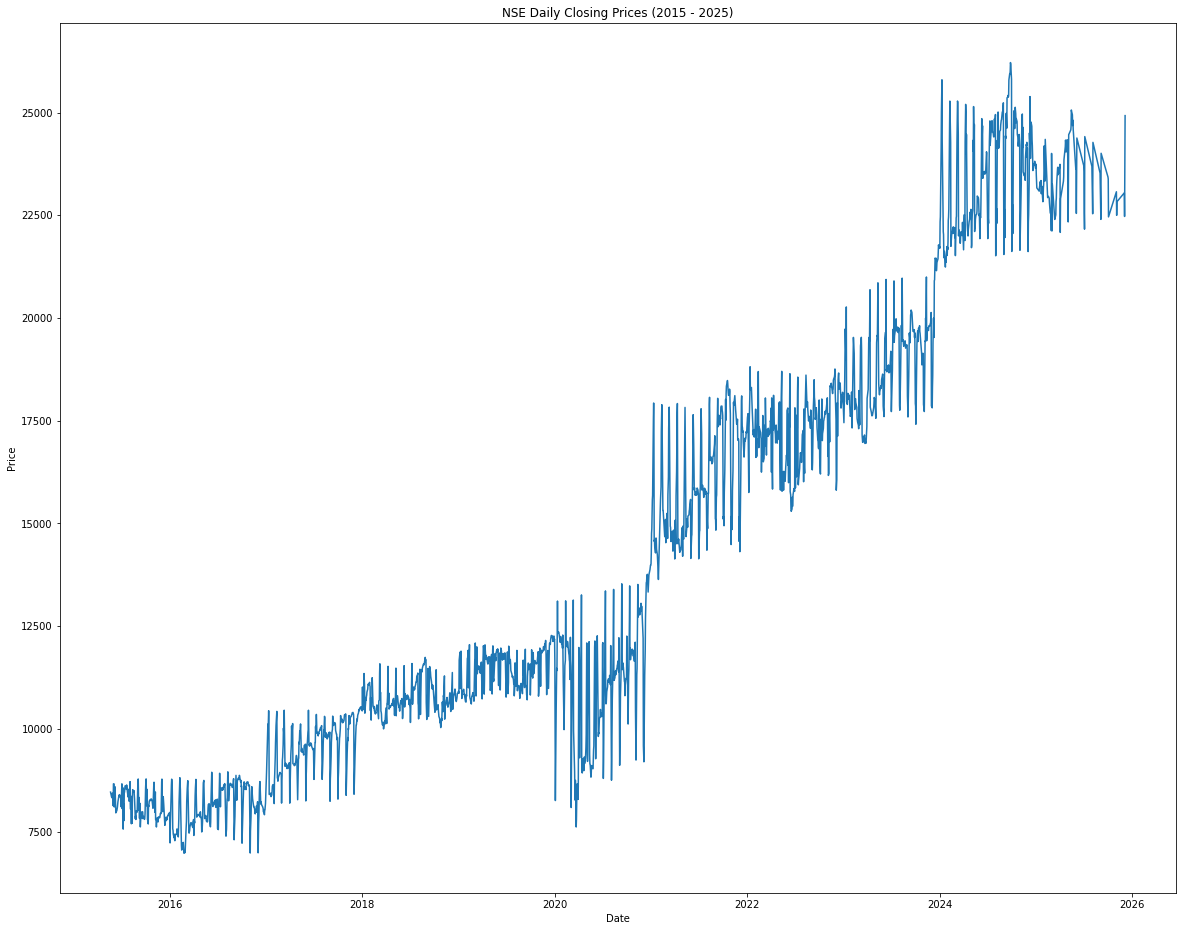

In [10]:
plt.figure(figsize=(20,16))
plt.plot(df1.index, df1['Price'])
plt.title('NSE Daily Closing Prices (2015 - 2025)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


## Augmented Dickey Fuller Tests to confirm non-stationarity

In [11]:

# Step 2: ADF test on price levels
adf_result_prices = adfuller(df1.Price.dropna())
print('ADF Statistic (Price levels):', adf_result_prices[0])
print('p-value:', adf_result_prices[1])
print('Critical Values:', adf_result_prices[4])

ADF Statistic (Price levels): 0.3610953865563467
p-value: 0.9799802789481923
Critical Values: {'1%': -3.433018632796697, '5%': -2.8627189778654643, '10%': -2.567397617255774}


We can visually observe a trend in the series which signifies non-stationarity. Further, the p-value of ADF statistic is too high. Thus, we cannot reject the null Hypothesis that the series is non-stationary.

Lets check after differencing the series.

## First Differencing

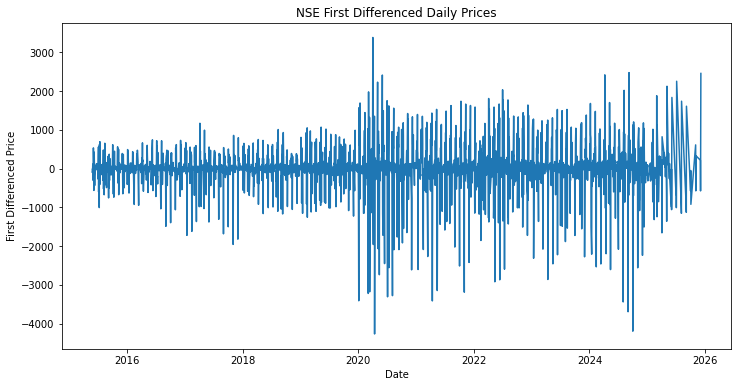

In [12]:

diff_1 = df1.Price.diff()

# Plot log returns
plt.figure(figsize=(12,6))
plt.plot(diff_1)
plt.title('NSE First Differenced Daily Prices')
plt.xlabel('Date')
plt.ylabel('First Differenced Price')
plt.show()

In [13]:
a = adfuller(diff_1.dropna())
print('ADF Statistic (Log Returns):', a[0])
print('p-value:', a[1])
print('Critical Values:', a[4])

ADF Statistic (Log Returns): -14.305676928819054
p-value: 1.2079811680550172e-26
Critical Values: {'1%': -3.433018632796697, '5%': -2.8627189778654643, '10%': -2.567397617255774}


The differenced series look like it has a constant mean, but we can't visually justify constant variance.
Although, the p-value of ADF test is lower than 0.01, thus with 99% confidence we can reject the null hypothesis that the series is non-stationary. 

Since, we observe varying variance in the differenced series, we must check differenced log returns.

## First Differenced Log Returns

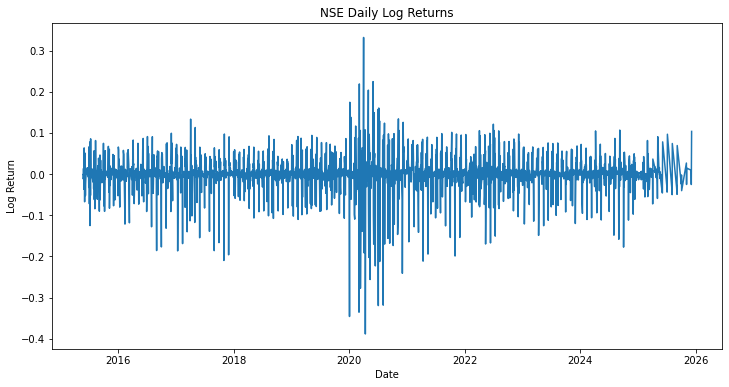

In [14]:
log_prices = np.log(df1.Price)
log_diff = log_prices.diff().dropna()

# Plot log returns
plt.figure(figsize=(12,6))
plt.plot(log_diff)
plt.title('NSE Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()

In [15]:
# Step 4: ADF test on log returns
adf_result_returns = adfuller(log_diff)
print('ADF Statistic (Log Returns):', adf_result_returns[0])
print('p-value:', adf_result_returns[1])
print('Critical Values:', adf_result_returns[4])

ADF Statistic (Log Returns): -14.338093487955318
p-value: 1.0715173862379216e-26
Critical Values: {'1%': -3.433018632796697, '5%': -2.8627189778654643, '10%': -2.567397617255774}


The differenced log series looks stationary and so does the ADF test state. The p-value of ADF Test is less than 0.01, thus with 99% confidence, we can reject the null hypothesis that the series is non-stationary.

# Problem 5c: Monte Carlo Simulation
## Visualizing Unit root and Explosive root.

In [16]:
n = 500
white_noise = np.random.normal(0, 1, n)

# AR(1) with phi = 1 (unit root)
x_unit_root = np.zeros(n)
for t in range(1, n):
    x_unit_root[t] = x_unit_root[t-1] + white_noise[t]

# AR(1) with phi = 1.5 (explosive root)
x_explosive = np.zeros(n)
for t in range(1, n):
    x_explosive[t] = 1.5 * x_explosive[t-1] + white_noise[t]

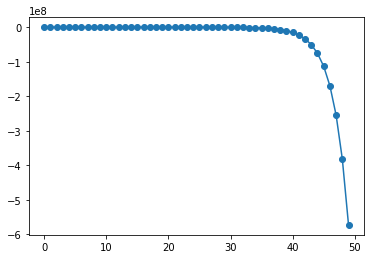

In [17]:
n = 50
e = np.random.normal(0, 1, n)
x_explosive = np.zeros(n)
for t in range(1, n):
    x_explosive[t] = 1.5 * x_explosive[t-1] + e[t]
    
plt.plot(x_explosive, marker = 'o')
plt.show()

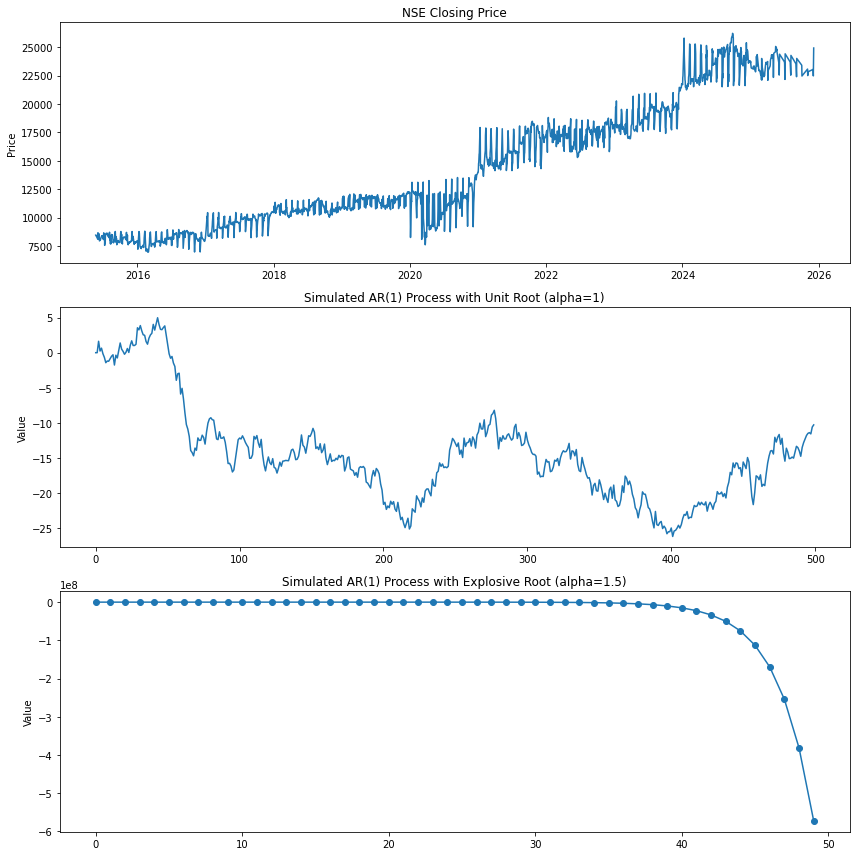

In [18]:
# Plotting the series
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot actual equity data
axes[0].plot(df1.Price)
axes[0].set_title("NSE Closing Price")
axes[0].set_ylabel("Price")

# Plot unit root simulation
axes[1].plot(x_unit_root)
axes[1].set_title("Simulated AR(1) Process with Unit Root (alpha=1)")
axes[1].set_ylabel("Value")

# Plot explosive root simulation
axes[2].plot(x_explosive, marker = 'o')
axes[2].set_title("Simulated AR(1) Process with Explosive Root (alpha=1.5)")
axes[2].set_ylabel("Value")

plt.tight_layout()

From the above visualization, we can observe that unit root is more closely linked with the real life financial dataset (NSE) compared to the explosive root. There are a ton of series which look very similar to the scenario with unit root. 

Thus, we focus on detecting unit root rather than explosive roots, since they are rather rarer in real world.